In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import matplotlib.colors
from tqdm import tqdm_notebook
import seaborn as sns
import imageio

import warnings
warnings.filterwarnings('ignore')

## 1. Importing  the data and processing it

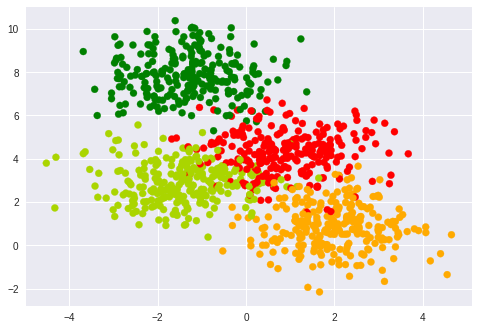

In [0]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


In [0]:
# one hot encoding of the labels since the labels are of 4 types
encoder = OneHotEncoder()
Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test_encoded = encoder.transform(Y_test.reshape(-1,1))
Y_train_encoded.shape, Y_test_encoded.shape

((750, 4), (250, 4))

## 2. Scalar Multi Class Neural Network

In [0]:
class MulitClassNN:
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    self.w7 = np.random.rand()
    self.w8 = np.random.rand()
    self.w9 = np.random.rand()
    self.w10 = np.random.rand()
    self.w11 = np.random.rand()
    self.w12 = np.random.rand()
    
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
    
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1,self.x2 = x
    
    # forward pass to layer 1
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # forward pass to layer 2
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
            
    # softmax function to predict the probability distribution
    sum_exp = np.exp(self.a3) + np.exp(self.a4) + np.exp(self.a5) + np.exp(self.a6)
    self.h3 = np.exp(self.a3)/sum_exp
    self.h4 = np.exp(self.a4)/sum_exp
    self.h5 = np.exp(self.a5)/sum_exp
    self.h6 = np.exp(self.a6)/sum_exp
    
    return np.array([self.h3,self.h4,self.h5,self.h6])
    
  def grad(self,x,y):
    
    self.forward_pass(x)
    self.y1, self.y2,self.y3,self.y4 = y
    
    # backpropagation from loss to output layer
    self.dw5 = (self.h3-self.y1)*self.h1
    self.dw6 = (self.h3-self.y1)*self.h2
    self.db3 = (self.h3-self.y1)
    
    self.dw7 = (self.h4-self.y2)*self.h1
    self.dw8 = (self.h4-self.y2)*self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3)*self.h1
    self.dw10 = (self.h5-self.y3)*self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4)*self.h1
    self.dw12 = (self.h6-self.y4)*self.h2
    self.db6 = (self.h6-self.y4)
    
    # backpropagation from loss to input layer
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1*(self.h1*(1-self.h1))*self.x1
    self.dw2 = self.dh1*(self.h1*(1-self.h1))*self.x2
    self.db1 = self.dh1*(self.h1*(1-self.h1))
   
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2*(self.h2*(1-self.h2))*self.x1
    self.dw4 = self.dh2*(self.h2*(1-self.h2))*self.x2
    self.db2 = self.dh2*(self.h2*(1-self.h2))
    
  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.array(Y_pred)
     
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs),unit='Epoch',total=epochs):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      # iterating over all the data set 
      # calculating the grad for each dataset and summing it up in one variable
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6
        
        
      # averaging out the each grad 
      m = X.shape[0]
      # updating the weights and biases
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.w7 -= learning_rate*dw7/m
      self.w8 -= learning_rate*dw8/m
      self.w9 -= learning_rate*dw9/m
      self.w10 -= learning_rate*dw10/m
      self.w11 -= learning_rate*dw11/m
      self.w12 -= learning_rate*dw12/m
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      self.b4 -= learning_rate*db4/m
      self.b5 -= learning_rate*db5/m
      self.b6 -= learning_rate*db6/m
      
      # updating has been done 
      # now display the loss 
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
      
      ## end of epochs ##
      
    if display_loss:
      plt.plot(loss.values())
      plt.title('Epochs vs Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      

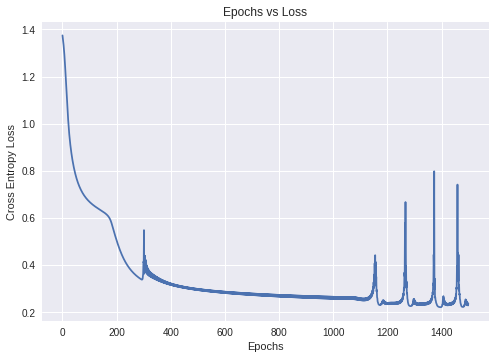

In [0]:
weight_matrices = {}
MultiNN = MulitClassNN()
MultiNN.fit(X_train,Y_train_encoded,display_loss=True,epochs=1500,learning_rate=1)

## 3. NN with vectorized weights

In [0]:
# initialization of the weights and biases
W1 = np.random.rand(2,2)
W2 = np.random.rand(2,4)
B1 = np.random.rand(1,2)
B2 = np.random.rand(1,4)

In [0]:
class MulitClassNN_weights_vectorized:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros(shape=(1,2))
    self.B2 = np.zeros(shape=(1,4))
    
    
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
    
  def softmax(self,x):
    exps =  np.exp(x)
    return exps/np.sum(exps) 
  
  def forward_pass(self,x):
    x = x.reshape(1,-1)
    
    # forward pass to layer 1
    self.A1 = np.matmul(x,self.W1) + self.B1 # (1,2)*(2,2) + (1,2) = (1,2)
    self.H1 = self.sigmoid(self.A1) # (1, 2)
            
    # forward pass to layer 2
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (1,2)*(2,4) + (1,4) = (1,4)
    self.H2 = self.softmax(self.A2) # (1,4)
        
    return self.H2
    
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def grad(self,x,y):
    
    self.forward_pass(x)
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    
    # backpropagation from loss to output layer
    
    self.dA2 = self.H2-y # (1,4)
    self.dW2 = np.matmul(self.H1.T,self.dA2) # (2,1)*(1,4)  = (2,4) 
    self.dB2 = self.dA2 # (1, 4)
    
    self.dH1 = np.matmul(self.dA2,self.W2.T) # (1, 4)*(4, 2) = (1, 2)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1)) # (1,2).*(1,2) = (1,2)
    
    self.dW1 = np.matmul(x.T,self.dA1) # (2,1) * (1,2) = (2,2) 
    self.dB1 = self.dA1 # (1,2) 
    
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
     
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs),unit='Epoch',total=epochs):
      # initialize the grads
      dW1 = np.zeros(shape=(2,2))
      dB1 = np.zeros(shape=(1,2))
      dW2 = np.zeros(shape=(2,4))
      dB2 = np.zeros(shape=(1,4)) 
      # iterating over all the data set 
      # calculating the grad for each dataset and summing it up in one variable
      for x,y in zip(X,Y):
        self.grad(x,y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2
        
        
      # averaging out the each grad 
      m = X.shape[0]
      # updating the weights and biases
      self.W1 -= learning_rate*dW1/m
      self.W2 -= learning_rate*dW2/m
      self.B1 -= learning_rate*dB1/m
      self.B2 -= learning_rate*dB2/m
      
      
      # updating has been done 
      # now display the loss 
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
      
      
      ## end of epochs ##
      
    if display_loss:
      plt.plot(loss.values())
      plt.title('Epochs vs Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      

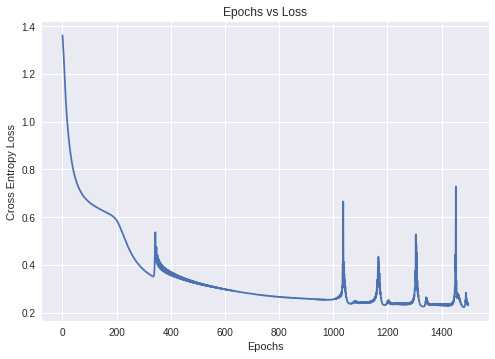

In [0]:
MultiNN = MulitClassNN_weights_vectorized(W1,W2)
MultiNN.fit(X_train,Y_train_encoded,display_loss=True,epochs=1500,learning_rate=1)

In [0]:
# Evaluation 
Y_pred_train = MultiNN.predict(X_train)
Y_pred_train_label = np.argmax(Y_pred_train,axis=1)

Y_pred_test = MultiNN.predict(X_test)
Y_pred_test_label = np.argmax(Y_pred_test,axis=1)

print('Accuracy score on training example: ',accuracy_score(Y_pred_train_label,Y_train))
print('Accuracy score on training example: ',accuracy_score(Y_pred_test_label,Y_test))

Accuracy score on training example:  0.9226666666666666
Accuracy score on training example:  0.924


## 4. NN with Vectorized Weights and Inputs

In [0]:
class MulitClassNN_weights_vectorized_inputs:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros(shape=(1,2))
    self.B2 = np.zeros(shape=(1,4))
    
    
  def sigmoid(self,X):
    return 1/(1+np.exp(-X))
    
  def softmax(self,X):
    exps =  np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self,X):
    # forward pass to layer 1
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N,2)*(2,2) + (1,2) = (N,2)
    self.H1 = self.sigmoid(self.A1) # (N, 2)
            
    # forward pass to layer 2
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (N,2)*(2,4) + (2,4) = (N,4)
    self.H2 = self.softmax(self.A2) # (N,4)
        
    return self.H2
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self,X,Y):
    self.forward_pass(X)
        
    # backpropagation from loss to output layer
    
    self.dA2 = self.H2-Y # (N,4)
    self.dW2 = np.matmul(self.H1.T,self.dA2) # (2,N)*(N,4)  = (2,4) 
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1) # (1, 4)
    
    self.dH1 = np.matmul(self.dA2,self.W2.T) # (N, 4)*(4, 2) = (N, 2)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1)) # (N,2).*(N,2) = (N,2)
    
    self.dW1 = np.matmul(X.T,self.dA1) # (2,N) * (N,2) = (2,2) 
    self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1) # (1,2) 
    
    
  def predict(self, X): 
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()
     
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs),unit='Epoch',total=epochs):
      # initialize the grads
      self.grad(X,Y)  
      # calculating the grad for each dataset and summing it up in one variable
      m = X.shape[0]
      # updating the weights and biases
      self.W1 -= learning_rate*self.dW1/m
      self.W2 -= learning_rate*self.dW2/m
      self.B1 -= learning_rate*self.dB1/m
      self.B2 -= learning_rate*self.dB2/m
    
      # now display the loss 
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
      
      
      ## end of epochs ##
      
    if display_loss:
      plt.plot(loss.values())
      plt.title('Epochs vs Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      

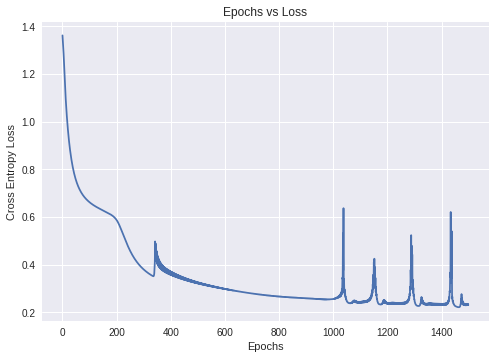

In [0]:
MultiNN3 = MulitClassNN_weights_vectorized_inputs(W1,W2)
MultiNN3.fit(X_train,Y_train_encoded,display_loss=True,epochs=1500,learning_rate=1)

In [0]:
# Evaluation 
Y_pred_train = MultiNN.predict(X_train)
Y_pred_train_label = np.argmax(Y_pred_train,axis=1)

Y_pred_test = MultiNN.predict(X_test)
Y_pred_test_label = np.argmax(Y_pred_test,axis=1)

print('Accuracy score on training example: ',accuracy_score(Y_pred_train_label,Y_train))
print('Accuracy score on training example: ',accuracy_score(Y_pred_test_label,Y_test))

## 5. Single Layer Network

In [0]:
# initialization of the weights and biases
W1 = np.random.rand(2,2)
W2 = np.random.rand(2,4)
B1 = np.random.rand(1,2)
B2 = np.random.rand(1,4)

In [0]:
class NN_weights_vectorized_inputs:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros(shape=(1,2))
    self.B2 = np.zeros(shape=(1,1))
    
    
  def sigmoid(self,X):
    return 1/(1+np.exp(-X))
  
  
  def forward_pass(self,X):
    # forward pass to layer 1
    self.A1 = np.matmul(X,self.W1) + self.B1 # (N,2)*(2,2) + (1,2) = (N,2)
    self.H1 = self.sigmoid(self.A1) # (N, 2)
            
    # forward pass to layer 2
    self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (N,2)*(2,1) + (1,1) = (N,1)
    self.H2 = self.sigmoid(self.A2) # (N,1)
        
    return self.H2
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self,X,Y):
    self.forward_pass(X)
        
    # backpropagation from loss to output layer
    
    self.dA2 = self.H2-Y # (N,1)
    self.dW2 = np.matmul(self.H1.T,self.dA2) # (2,N)*(N,1)  = (2,1) 
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1) # (1,1)
    
    self.dH1 = np.matmul(self.dA2,self.W2.T) # (N, 1)*(1, 2) = (N, 2)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1)) # (N,2).*(N,2) = (N,2)
    
    self.dW1 = np.matmul(X.T,self.dA1) # (2,N) * (N,2) = (2,2) 
    self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1) # (1,2) 
    
    
  def predict(self, X): 
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()
     
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs),unit='Epoch',total=epochs):
      # initialize the grads
      self.grad(X,Y)  
      # calculating the grad for each dataset and summing it up in one variable
      m = X.shape[0]
      # updating the weights and biases
      self.W1 -= learning_rate*self.dW1/m
      self.W2 -= learning_rate*self.dW2/m
      self.B1 -= learning_rate*self.dB1/m
      self.B2 -= learning_rate*self.dB2/m
    
      # now display the loss 
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
      
      
      ## end of epochs ##
      
    if display_loss:
      plt.plot(loss.values())
      plt.title('Epochs vs Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      